In [1]:
from data_preprocess import *
from utils import *
from plotting import *
from performance import *
from long_short_profoilo import *
import empyrical
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# data loading and proprecess
new_data1,new_data2 = data_preprocess()
#new_data = new_data1[new_data1['date'] > pd.to_datetime('2017-01-01')]
new_data = new_data1
industry_num = 28
new_data = day_return_calculate(new_data)
new_data = half_life_weight_calculate(new_data)
new_data = value_weight_calculate(new_data,28)
new_data = day_return_with_value_weight_calculate(new_data)

In [3]:
# calculate asset_group_ratio factor
# 取特征向量为2，计算因子时间间隔为1000days
feature_num = 2
date_interval = 1000
data = new_data.copy()
data = asset_group_ratio_process(data, feature_num, industry_num, date_interval)
data = asset_group_ratio_std(data, industry_num, date_interval)

100%|█████████| 2589/2589 [01:51<00:00, 23.15it/s]


Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
The result of cumulative_returns:
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-1.076548,-0.566095,-0.878590,0.132624,10645,10.714322
2,-0.917325,-0.501165,-0.730582,0.102609,10645,10.714322
3,-0.707093,-0.446183,-0.564827,0.047288,10645,10.714322
4,-0.563718,-0.386247,-0.498032,0.038913,7097,7.143217
5,-0.522236,-0.197049,-0.429930,0.047189,10645,10.714322
6,-0.449681,-0.126909,-0.319251,0.071643,10644,10.713315
7,-0.355762,-0.022410,-0.183812,0.076229,7097,7.143217
8,-0.107234,0.564984,0.229095,0.194565,10645,10.714322
9,0.239805,1.532389,0.921757,0.296137,10645,10.714322


Returns Analysis


,1D,5D
Ann. alpha,0.035,0.011
beta,0.033,0.005
Mean Period Wise Return Top Quantile (bps),0.333,0.292
Mean Period Wise Return Bottom Quantile (bps),-0.416,-0.348
Mean Period Wise Spread (bps),0.749,0.616


<Figure size 432x288 with 0 Axes>

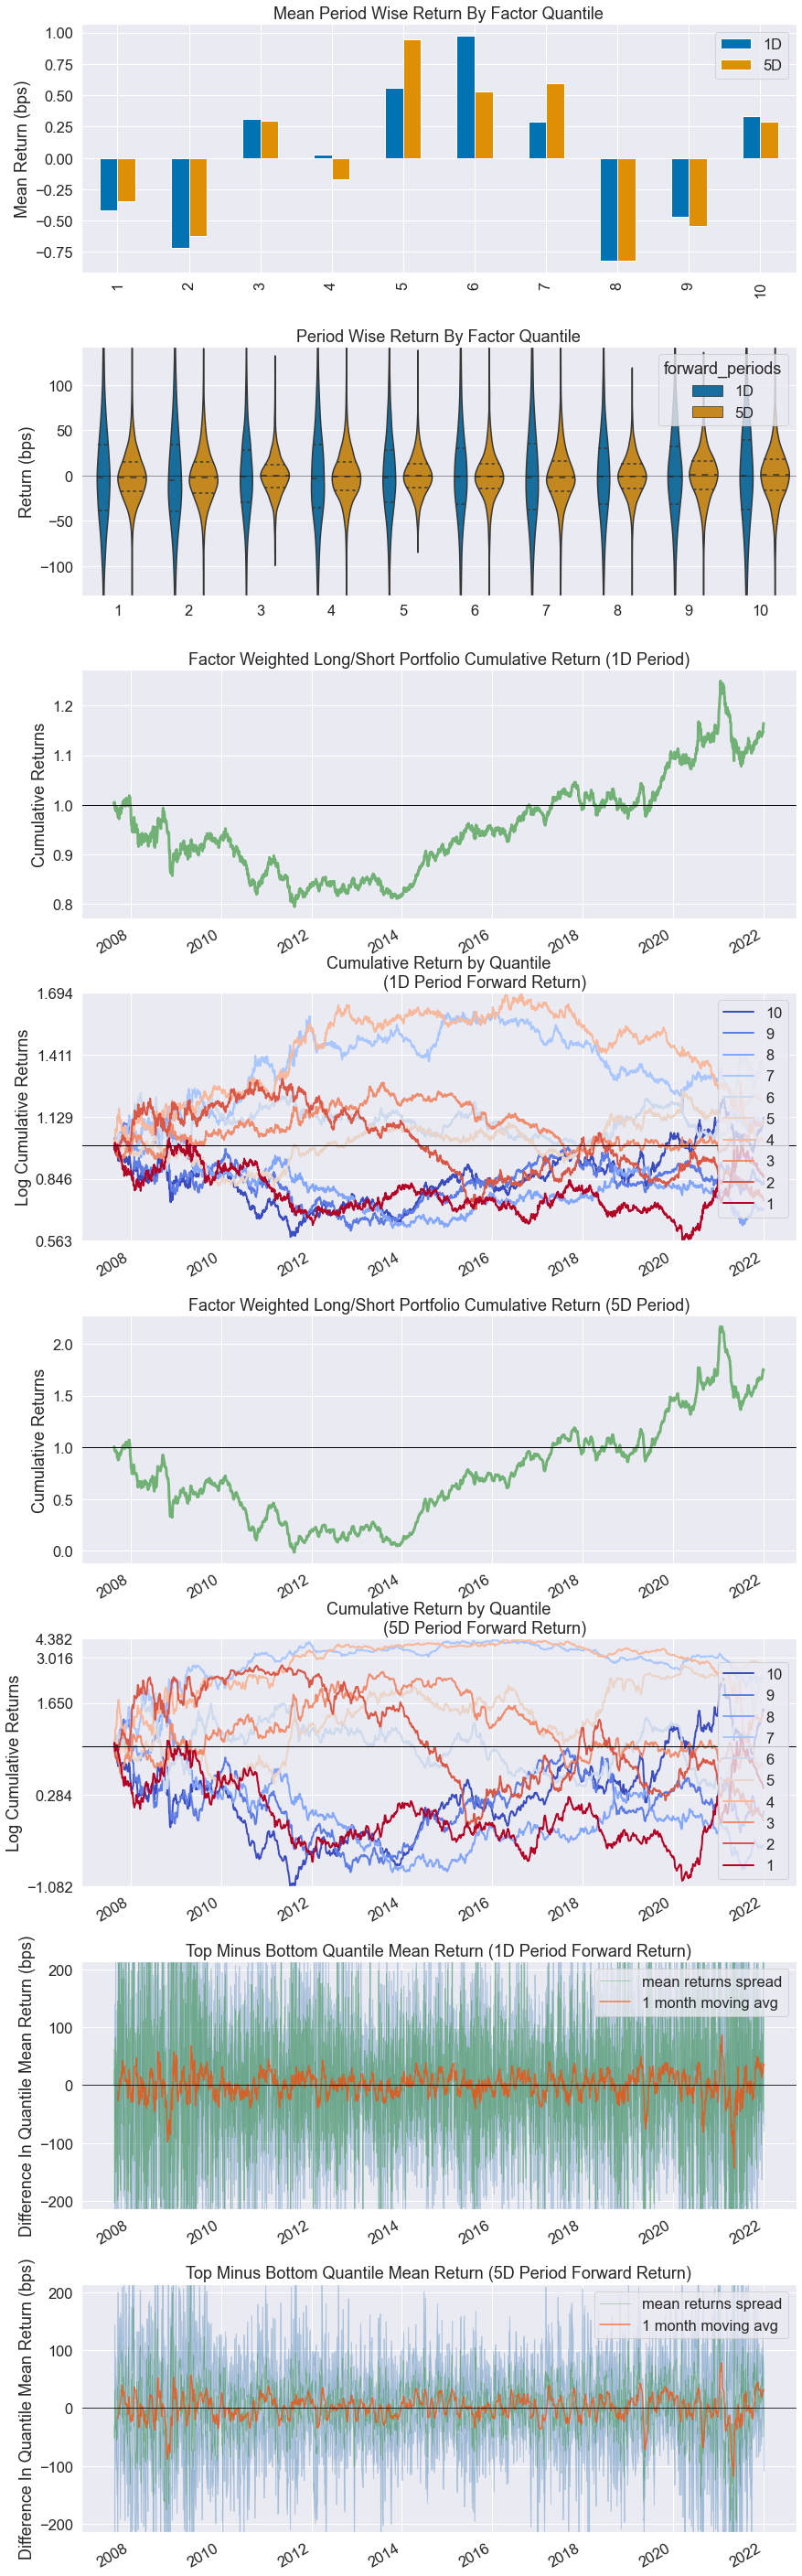

Information Analysis


,1D,5D
IC Mean,0.017,0.021
IC Std.,0.264,0.264
Risk-Adjusted IC,0.063,0.080
t-stat(IC),3.755,4.790
p-value(IC),0.000,0.000
IC Skew,-0.009,0.029
IC Kurtosis,-0.445,-0.469


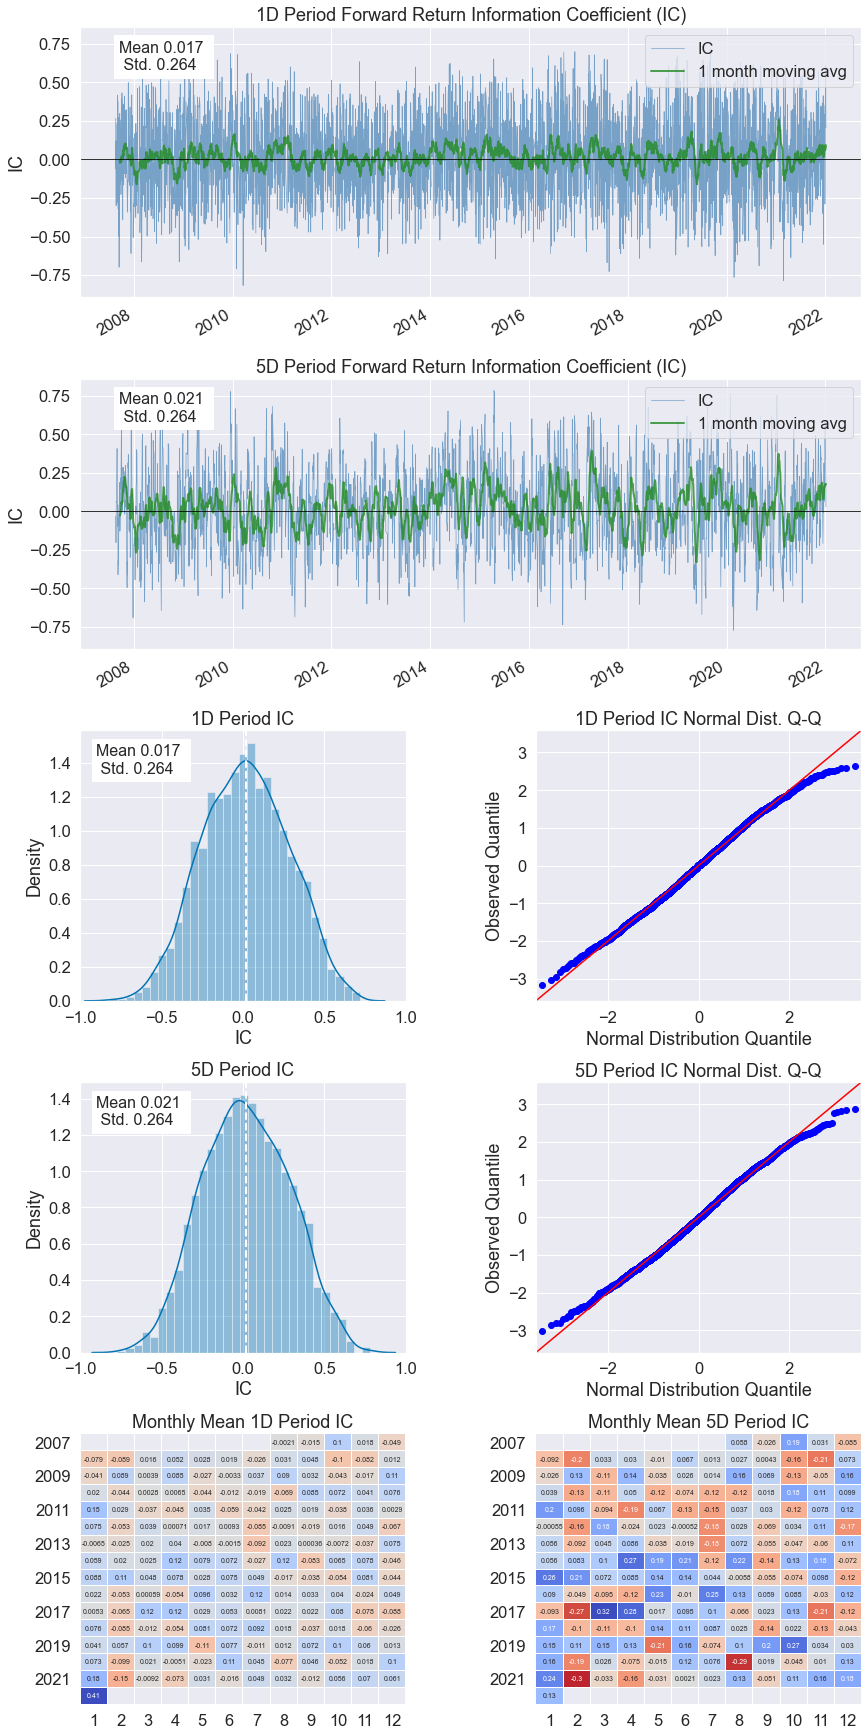

The result of noncumulative_returns:
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-1.076548,-0.566095,-0.878590,0.132624,10645,10.714322
2,-0.917325,-0.501165,-0.730582,0.102609,10645,10.714322
3,-0.707093,-0.446183,-0.564827,0.047288,10645,10.714322
4,-0.563718,-0.386247,-0.498032,0.038913,7097,7.143217
5,-0.522236,-0.197049,-0.429930,0.047189,10645,10.714322
6,-0.449681,-0.126909,-0.319251,0.071643,10644,10.713315
7,-0.355762,-0.022410,-0.183812,0.076229,7097,7.143217
8,-0.107234,0.564984,0.229095,0.194565,10645,10.714322
9,0.239805,1.532389,0.921757,0.296137,10645,10.714322


Returns Analysis


,1D,5D
Ann. alpha,0.035,0.007
beta,0.033,0.033
Mean Period Wise Return Top Quantile (bps),0.333,0.042
Mean Period Wise Return Bottom Quantile (bps),-0.416,-0.068
Mean Period Wise Spread (bps),0.749,0.107


<Figure size 432x288 with 0 Axes>

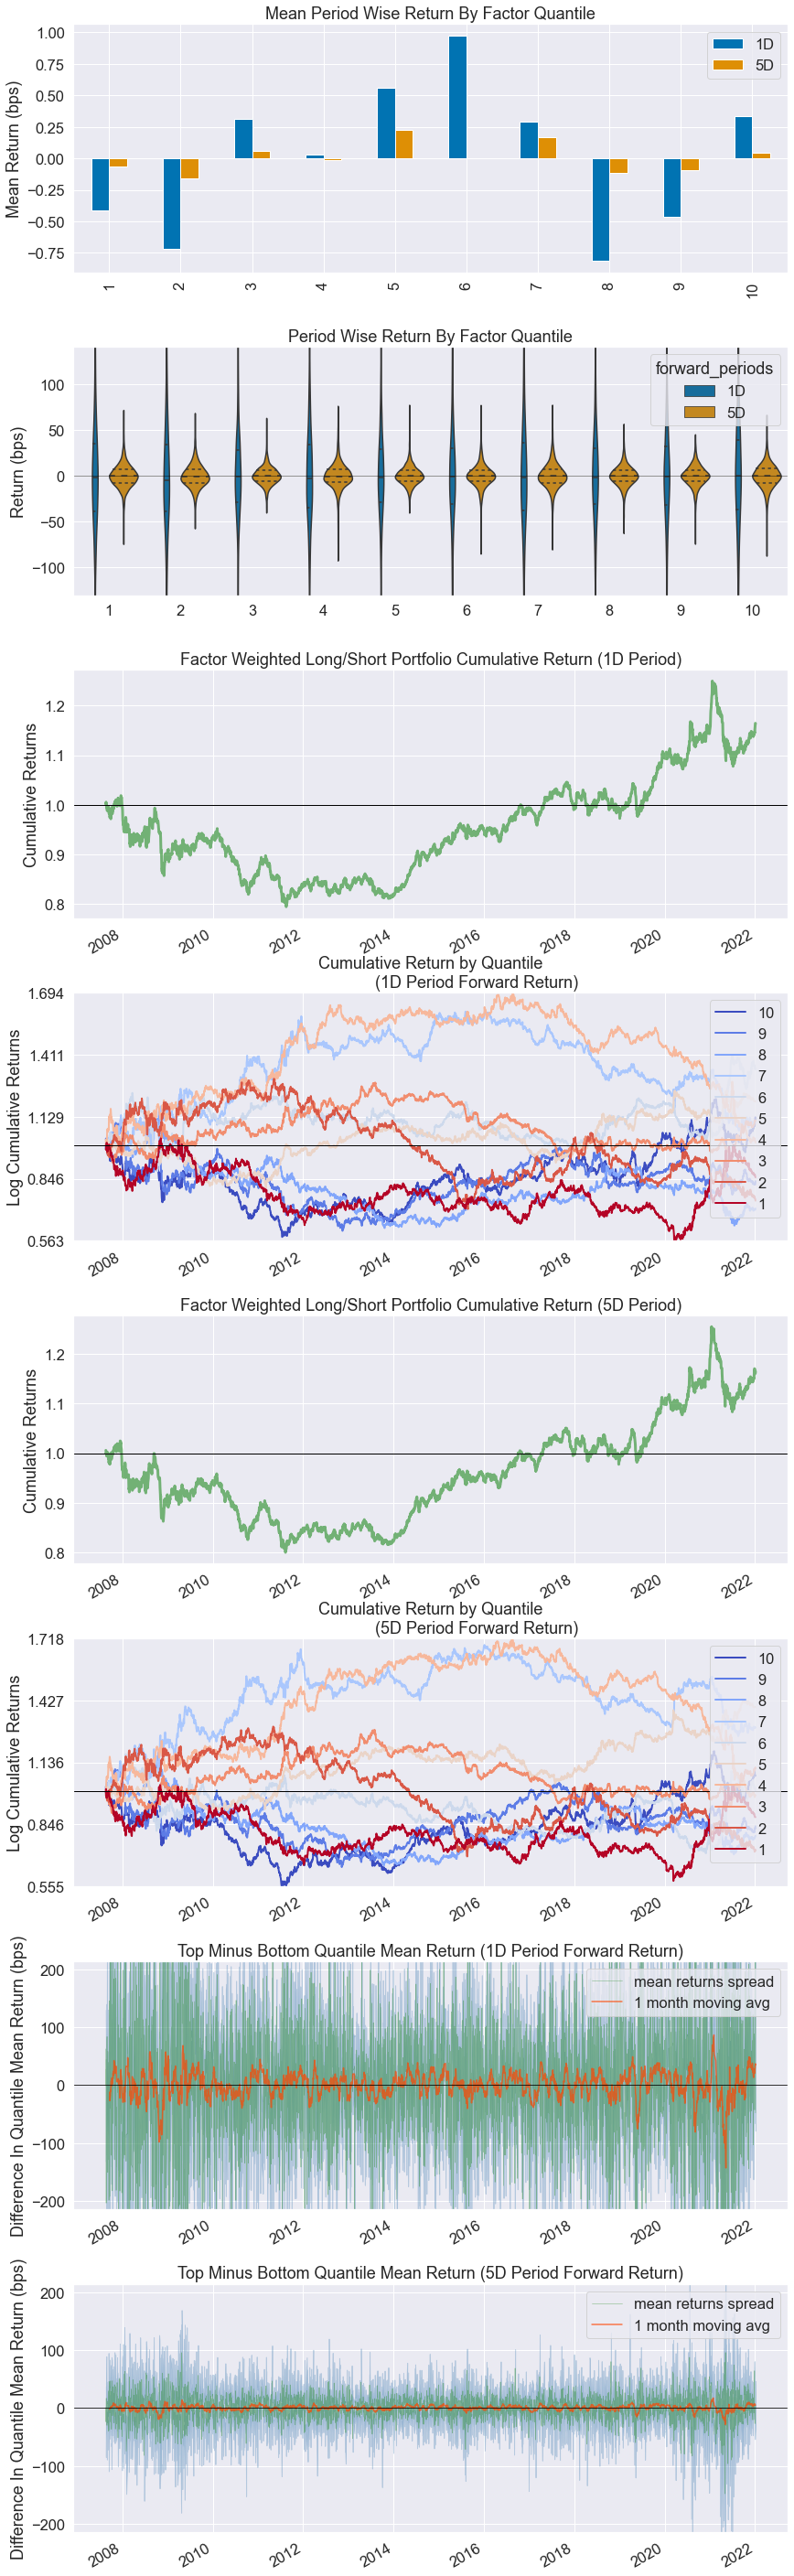

Information Analysis


,1D,5D
IC Mean,0.017,0.017
IC Std.,0.264,0.264
Risk-Adjusted IC,0.063,0.063
t-stat(IC),3.755,3.774
p-value(IC),0.000,0.000
IC Skew,-0.009,-0.009
IC Kurtosis,-0.445,-0.443


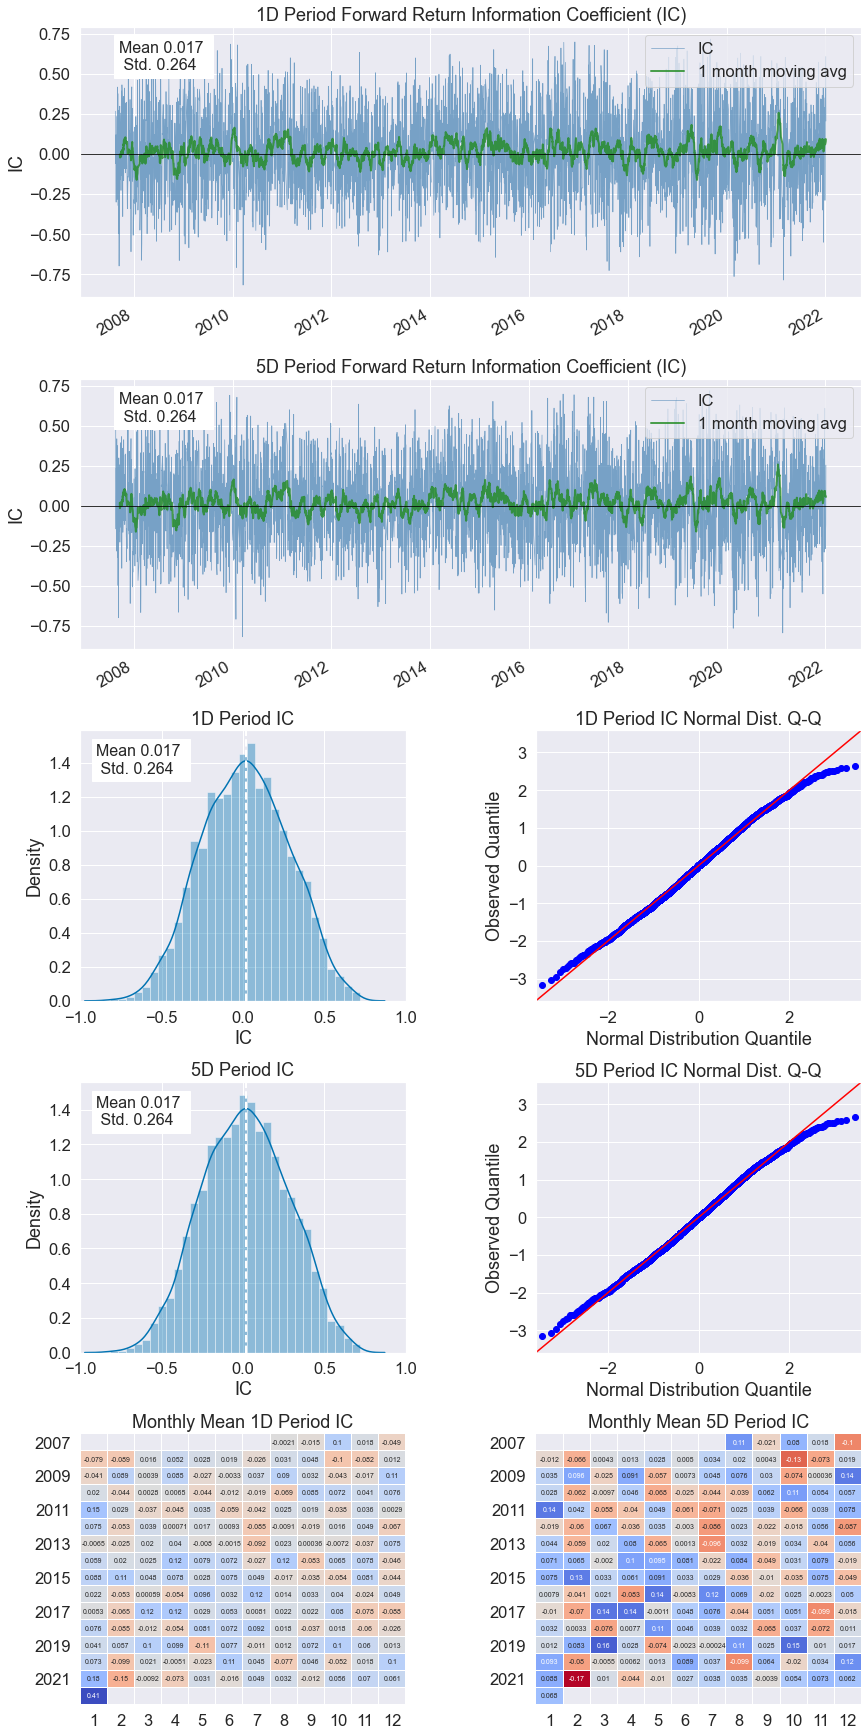

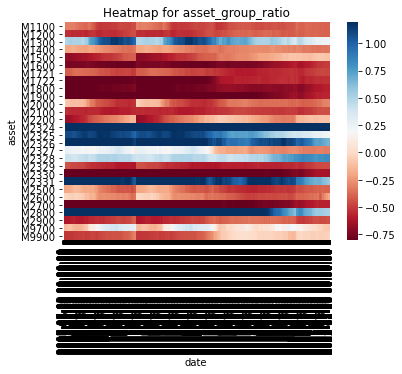

In [4]:
#截面因子测试
factor_test(data, 'asset_group_ratio', 'test4')
heat_map(data, 'asset_group_ratio', 'test4')

In [5]:
#行业择时策略
data = data[data['date'] > pd.to_datetime('2011-07-05')]
industry_list = data['ID'].unique()
params = pd.DataFrame()
#选取计算周期天数为1250，标准差倍数为1
day = 1250
std_n = 1
for indus in industry_list:
    print(f'result of {indus}:')
    sub_data = data[data['ID'] == indus]
    sub_data = sub_data.reset_index().drop('index',axis = 1)
    params_dict = test_best_params(sub_data, day, std_n, indus)
    params_list = [params_dict['ID'],params_dict['method'],params_dict['direction']] + list(params_dict[indus].values())
    cols = ['ID','method','direction','annual_return','annual_volatility','max_drawdown','calmar_ratio','sharpe_ratio','win_rate']
    params_df = pd.DataFrame(np.array(params_list).reshape(1,9), index=[1], columns=cols)
    # sub_data = long_short2(sub_data,1,day,std_n)
    # returns = sub_data['long_short2'] * sub_data['day_return']
    # performance(returns,dict,indus)
    # cum_return = np.cumprod(1+returns)
    # plt.plot(range(len(cum_return)),cum_return)
    # plt.show()
    params = pd.concat([params,params_df],ignore_index=True)
    print('********************************************************')
    print(params_df)

result of M1100:
annual_return: -0.0013965214450770702
annual_volatility: 0.06509609763293035
max_drawdown: -0.21989885480550053
calmar_ratio: 0.006350744510753758
sharpe_ratio: -0.4823103471135637
win_rate 0.4869109947643979
annual_return: -0.0028394326392841007
annual_volatility: 0.06509609763293035
max_drawdown: -0.1871903601158249
calmar_ratio: 0.015168690511237804
sharpe_ratio: -0.5044762103016068
win_rate 0.5130890052356021
annual_return: 0.0333892998306371
annual_volatility: 0.09961878247728201
max_drawdown: -0.2628252158699702
calmar_ratio: 0.12703994066975702
sharpe_ratio: 0.03402269879588246
win_rate 0.5258278145695364
annual_return: -0.04187644831087911
annual_volatility: 0.09961878247728201
max_drawdown: -0.46010145376772826
calmar_ratio: 0.09101568353665643
sharpe_ratio: -0.7215150248124191
win_rate 0.4741721854304636
********************************************************
      ID       method direction       annual_return    annual_volatility  \
1  M1100  long_short2   

annual_return: -0.03380060020831632
annual_volatility: 0.0783545067527529
max_drawdown: -0.41260895952221177
calmar_ratio: 0.08191921049764977
sharpe_ratio: -0.8142556548743095
win_rate 0.48157248157248156
annual_return: 0.02864406970597111
annual_volatility: 0.0783545067527529
max_drawdown: -0.14220723528745705
calmar_ratio: 0.2014248406423915
sharpe_ratio: -0.017305070891550863
win_rate 0.5184275184275184
annual_return: -0.012598485116339875
annual_volatility: 0.12025566063094023
max_drawdown: -0.42605276509386003
calmar_ratio: 0.02957024610218035
sharpe_ratio: -0.35423268137932323
win_rate 0.5103270223752151
annual_return: -0.001786007052480998
annual_volatility: 0.12025566063094023
max_drawdown: -0.44388735789204536
calmar_ratio: 0.004023559177180621
sharpe_ratio: -0.26432025640797874
win_rate 0.48967297762478484
********************************************************
      ID       method direction        annual_return   annual_volatility  \
1  M1722  long_short1        -1  0.028

annual_return: 0.001150975818099198
annual_volatility: 0.06459121611229329
max_drawdown: -0.2192883772670089
calmar_ratio: 0.0052486859196269765
sharpe_ratio: -0.44664005290976594
win_rate 0.5047169811320755
annual_return: -0.04897707968032894
annual_volatility: 0.10989371778736237
max_drawdown: -0.500845474550897
calmar_ratio: 0.09778880347126263
sharpe_ratio: -0.7186678298858244
win_rate 0.4591760299625468
annual_return: 0.038867694588538226
annual_volatility: 0.10989371778736237
max_drawdown: -0.28045558086560285
calmar_ratio: 0.1385877024396388
sharpe_ratio: 0.0806933714418205
win_rate 0.5408239700374532
********************************************************
      ID       method direction         annual_return    annual_volatility  \
1  M2325  long_short2        -1  0.038867694588538226  0.10989371778736237   

           max_drawdown        calmar_ratio        sharpe_ratio  \
1  -0.28045558086560285  0.1385877024396388  0.0806933714418205   

             win_rate  
1  0.540823

annual_return: 0.015151741385288187
annual_volatility: 0.0428062189454155
max_drawdown: -0.10281962865385175
calmar_ratio: 0.1473623430045386
sharpe_ratio: -0.3468715289627804
win_rate 0.5683453237410072
annual_return: -0.016730322846332246
annual_volatility: 0.0428062189454155
max_drawdown: -0.2026490793943323
calmar_ratio: 0.08255809943146557
sharpe_ratio: -1.0916713505091533
win_rate 0.4316546762589928
annual_return: 0.023138439779195608
annual_volatility: 0.0895547320489602
max_drawdown: -0.2960258522418391
calmar_ratio: 0.07816357795768661
sharpe_ratio: -0.07661862264355979
win_rate 0.5111969111969112
annual_return: -0.030425419832701306
annual_volatility: 0.0895547320489602
max_drawdown: -0.44451139623736546
calmar_ratio: 0.06844688368001792
sharpe_ratio: -0.6747317361149192
win_rate 0.4888030888030888
********************************************************
      ID       method direction         annual_return   annual_volatility  \
1  M2500  long_short2         1  0.02313843977

In [7]:
params.sort_values(by='annual_return',ascending = False )

,ID,method,direction,annual_return,annual_volatility,max_drawdown,calmar_ratio,sharpe_ratio,win_rate
22,M2600,long_short2,1,0.17813768360325466,0.22058779534258477,-0.48869223205506396,0.3645191634295975,0.6715588383898975,0.5327679259830378
15,M2326,long_short1,1,0.09060723354584188,0.12092652290433618,-0.17624815005550543,0.5140889905358278,0.5011905749889765,0.5429292929292929
5,M1600,long_short2,1,0.07886058513895478,0.18108258627410068,-0.4423849243126342,0.17826237017793098,0.26982486910693665,0.5301109350237718
11,M2100,long_short2,-1,0.06141796274013922,0.12220900561258899,-0.3479863199776624,0.17649533678243934,0.2570838587766301,0.526275115919629
17,M2328,long_short2,1,0.05539407072735081,0.16581521752085412,-0.3839878429176993,0.14425995965508603,0.15314680466017583,0.5515840779853778
20,M2331,long_short2,-1,0.054781020251378765,0.11857708350901339,-0.24944505687093,0.21961156873003915,0.2089865892973754,0.5350140056022409
18,M2329,long_short2,1,0.04974293001846597,0.08971581005344857,-0.28264812575574305,0.1759888903754928,0.22006076751359696,0.5736677115987461
19,M2330,long_short1,-1,0.04423082666390865,0.07351413153346757,-0.09028426465657102,0.4899062625381805,0.19357947060056088,0.5379310344827586
10,M2000,long_short2,-1,0.042364616217758666,0.10816480753867688,-0.296401786096543,0.14292969275144585,0.11431274643869177,0.5665024630541872
4,M1500,long_short2,1,0.04107490430009175,0.14381268866505725,-0.4082797680586143,0.10060479973182229,0.0770092291778609,0.537023186237846
